# 1. Loading the Data:
"Property_data.csv" file was already given so Data Collection through Web Scraping from real estate websites or collecting data from local real estate agents is not required.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2: Loading the Data
data = pd.read_csv(r"C:\Users\USER\Downloads\Property_data.csv")

# Display the first few rows 
data.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# DataFrame info
print("\nDataFrame Info:")
data.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  Bldg

# 2. Cleaning the Data:

In [4]:
# DataFrame for missing values
missing_values_df = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': data.isnull().sum()
})

# Filter to show only columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print("\nMissing Values:")
print(missing_values_df)

# Duplicates
print(f"\nDuplicates: {data.duplicated().sum()}")


Missing Values:
                                    Column  Missing Values
PropertyFrontage          PropertyFrontage             259
Alley                                Alley            1369
ExteriorCladdingType  ExteriorCladdingType             872
ExteriorCladdingArea  ExteriorCladdingArea               8
BsmntFinish                    BsmntFinish              37
BsmntMaintenance          BsmntMaintenance              37
BsmntVisibility            BsmntVisibility              38
BsmntFinRat1                  BsmntFinRat1              37
BsmntFinQual1                BsmntFinQual1              38
Electrical                      Electrical               1
QualFireplace                QualFireplace             690
BasementType                  BasementType              81
BasementYrBlt                BasementYrBlt              81
BasementFinish              BasementFinish              81
BasementQual                  BasementQual              81
BasementCond                  BasementC

# 3. Identification of Categorical and Numerical columns:

In [5]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating', 'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'QualFireplace', 'BasementType', 'BasementFinish', 'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC', 'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn']

Numerical Columns:
['PropertyID', 'PropertyClass', 'PropertyFrontage', 'PropertySize', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExteriorCladdingArea', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2',

In [6]:
# Removing any warning message that comes
import warnings
warnings.filterwarnings("ignore")

# Filling numerical missing values with mean
data[numerical_cols].fillna(data[numerical_cols].mean(), inplace=True)

# Filling categorical missing values with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# DataFrame info after Filling
print("\nDataFrame Info after Filling:")
data.info()


DataFrame Info after Filling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 1460 non-null   object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   obj

In [7]:
# Display missing values for the problematic columns
missing_cols = ['PropertyFrontage', 'ExteriorCladdingArea', 'BasementYrBlt']
print(data[missing_cols].isnull().sum())

PropertyFrontage        259
ExteriorCladdingArea      8
BasementYrBlt            81
dtype: int64


In [8]:
# Removing any warning message that comes
import warnings
warnings.filterwarnings("ignore")


# Handling specific problematic columns
data['PropertyFrontage'].fillna(data['PropertyFrontage'].median(), inplace=True)
data['ExteriorCladdingArea'].fillna(data['ExteriorCladdingArea'].mean(), inplace=True)
data['BasementYrBlt'].fillna(data['BasementYrBlt'].mode()[0], inplace=True)

# Verifying no missing values remain in the entire dataset
if data.isnull().sum().sum() == 0:
    print("All missing values have been handled.")
else:
    print("Remaining missing values:")
    print(data.isnull().sum()[data.isnull().sum() > 0])

All missing values have been handled.


# 4. Outlier Detection and Handling:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers Identification using the IQR method
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Count of outliers for each numerical feature
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns  # Identify numerical features
outlier_counts = {feature: len(identify_outliers_iqr(data, feature)) for feature in numerical_features}

print("Count of outliers per feature (IQR):")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")

Count of outliers per feature (IQR):
PropertyID: 0
PropertyClass: 103
PropertyFrontage: 106
PropertySize: 69
OverallQual: 2
OverallCond: 125
YearBuilt: 7
YearRemodAdd: 0
ExteriorCladdingArea: 98
BsmntFinSty1: 7
BsmtFinSF2: 167
BsmtUnfSF: 29
BsmntSqFtage: 61
1stFlrSF: 20
2ndFlrSF: 2
LowQualFinSF: 26
GrLivArea: 31
BsmtFullBath: 1
BsmtHalfBath: 82
Bath1: 0
Bath2: 0
BedroomUpLev: 35
KitchenUpLev: 68
CntRmsUpLev: 30
CntFireplaces: 5
BasementYrBlt: 1
BasementCars: 5
BasementSqFootage: 21
WoodDeckSF: 32
OpenPorchSF: 77
EnclosedPorch: 208
3SsnPorch: 24
ScreenPorch: 116
PoolArea: 7
AddVal: 52
SaleMon: 0
SaleYr: 0
PropPrice: 61


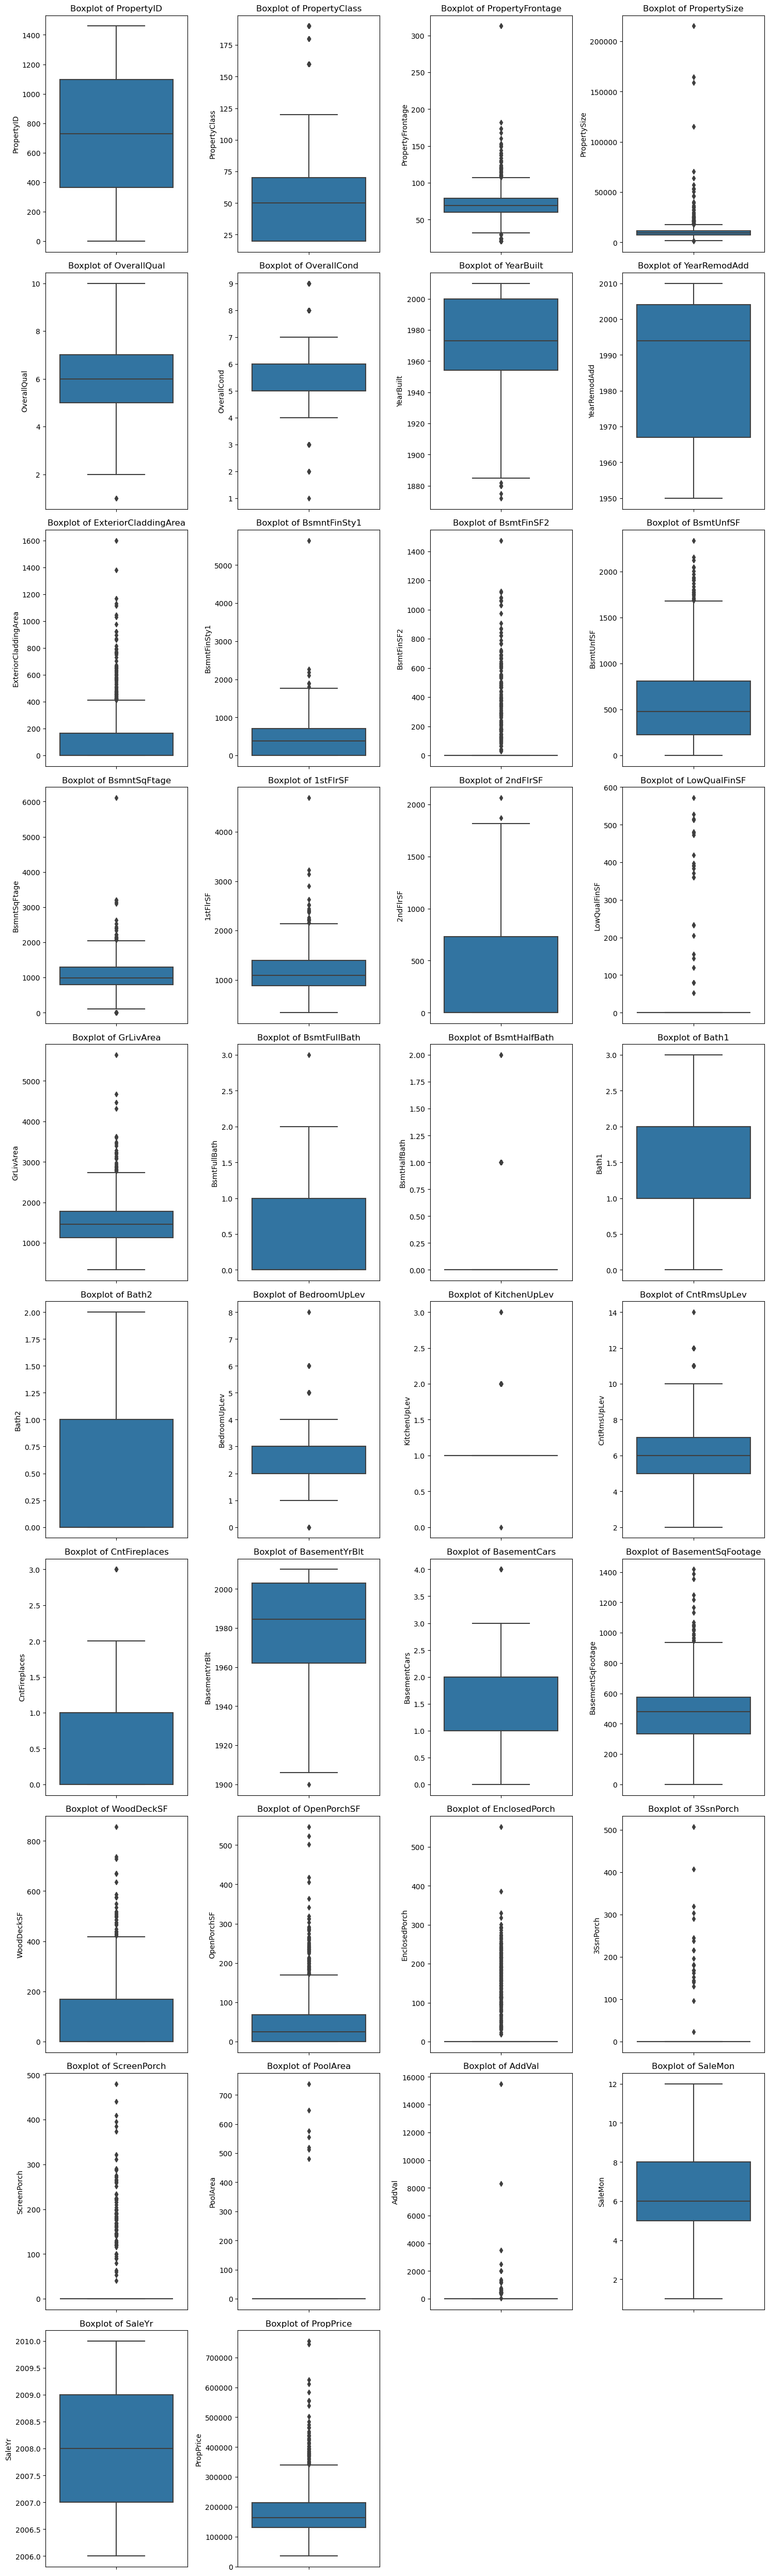

In [10]:
# Visualization of outliers using boxplots
import math

# Number of numerical features
num_features = len(numerical_features)
cols = 4 
rows = math.ceil(num_features / cols)

for i in range(0, num_features, cols * rows):
    plt.figure(figsize=(15, 5 * rows))
    for j in range(cols * rows):
        if i + j < num_features:
            feature = numerical_features[i + j]
            plt.subplot(rows, cols, j + 1)
            sns.boxplot(data=data, y=feature)
            plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

In [11]:
# Handling outliers using the IQR method
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

for col in numerical_cols:
    handle_outliers(data, col)

# Count of outliers after handling
outlier_counts_after = {feature: len(identify_outliers_iqr(data, feature)) for feature in numerical_features}
print("\nOutlier count after handling (IQR):")
for feature, count in outlier_counts_after.items():
    print(f"{feature}: {count}")


Outlier count after handling (IQR):
PropertyID: 0
PropertyClass: 0
PropertyFrontage: 0
PropertySize: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
ExteriorCladdingArea: 0
BsmntFinSty1: 0
BsmtFinSF2: 0
BsmtUnfSF: 0
BsmntSqFtage: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
Bath1: 0
Bath2: 0
BedroomUpLev: 0
KitchenUpLev: 0
CntRmsUpLev: 0
CntFireplaces: 0
BasementYrBlt: 0
BasementCars: 0
BasementSqFootage: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
AddVal: 0
SaleMon: 0
SaleYr: 0
PropPrice: 0


# 5. Identification of Ordinal and Nominal Columns:

In [12]:
# Ordinal columns as per my observation:

# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# BsmntFinRat1: Quality of basement finished area
# BsmntFinQual1: Quality of second finished area
# KitchenQual: Kitchen quality
# Functional: Home functionality rating
# QualFireplace: Fireplace quality

ordinal_cols = [
    'OverallQual', 'OverallCond', 'BsmntFinRat1', 'BsmntFinQual1', 
    'KitchenQual', 'Functional', 'QualFireplace']

# Nominal columns by excluding ordinal columns from Categorical Columns
nominal_cols = list(set(categorical_cols) - set(ordinal_cols))

# Identified columns (in Categorical)
print("Ordinal Columns:", ordinal_cols)
print("\nNominal Columns:", nominal_cols)

Ordinal Columns: ['OverallQual', 'OverallCond', 'BsmntFinRat1', 'BsmntFinQual1', 'KitchenQual', 'Functional', 'QualFireplace']

Nominal Columns: ['Roof2Material', 'BasementQual', 'Amenities', 'RoofStyle', 'PropertyStyle', 'Electrical', 'SaleType', 'Neighborhood', 'Grade', 'Street', 'BsmntMaintenance', 'HeatingEfficiency', 'Orientation', 'BasementFinish', 'RoofMatl', 'CentralAir', 'PropertyFooting', 'Elevation', 'PavedDrive', 'PoolQC', 'BsmntFinish', 'Heating', 'AddFeatures', 'ExterCond', 'BasementCond', 'SaleCondn', 'ExterQual', 'BasementType', 'BsmntVisibility', 'BoundaryFeatures', 'PropertyShape', 'Alley', 'Condition1', 'Roof1Material', 'Condition2', 'BldgType', 'ExteriorCladdingType', 'PropertyZone']


In [13]:
# Display unique values and counts for ordinal columns
for col in ordinal_cols:
    print(f"Unique values for '{col}':")
    print(data[col].value_counts().sort_index())
    print("-" * 40)

Unique values for 'OverallQual':
OverallQual
2.0       5
3.0      20
4.0     116
5.0     397
6.0     374
7.0     319
8.0     168
9.0      43
10.0     18
Name: count, dtype: int64
----------------------------------------
Unique values for 'OverallCond':
OverallCond
3.5     31
4.0     57
5.0    821
6.0    252
7.0    205
7.5     94
Name: count, dtype: int64
----------------------------------------
Unique values for 'BsmntFinRat1':
BsmntFinRat1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    467
Name: count, dtype: int64
----------------------------------------
Unique values for 'BsmntFinQual1':
BsmntFinQual1
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1294
Name: count, dtype: int64
----------------------------------------
Unique values for 'KitchenQual':
KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: count, dtype: int64
----------------------------------------
Unique values for 'Functional':
Functional
Maj1      14
Maj2       5
Min1      31


# 6. Encoding (Ordinal and Nominal):

In [14]:
# Displaying unique values for nominal columns
for col in nominal_cols:
    print(f"Unique values for '{col}':")
    print(data[col].unique())
    print(f"Number of unique values: {data[col].nunique()}")
    print("-" * 40)

Unique values for 'Roof2Material':
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Number of unique values: 16
----------------------------------------
Unique values for 'BasementQual':
['TA' 'Fa' 'Gd' 'Ex' 'Po']
Number of unique values: 5
----------------------------------------
Unique values for 'Amenities':
['AllPub' 'NoSeWa']
Number of unique values: 2
----------------------------------------
Unique values for 'RoofStyle':
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Number of unique values: 6
----------------------------------------
Unique values for 'PropertyStyle':
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Number of unique values: 8
----------------------------------------
Unique values for 'Electrical':
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Number of unique values: 5
----------------------------------------
Unique values for 'SaleTyp

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# Automatic ordinal encoding based on the sorted order of unique values
ordinal_encoder = OrdinalEncoder()

# Transforming ordinal columns
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])

# Displaying encoded ordinal data
print("Encoded Ordinal Columns Preview:")
data[ordinal_cols].head()

Encoded Ordinal Columns Preview:


,OverallQual,OverallCond,BsmntFinRat1,BsmntFinQual1,KitchenQual,Functional,QualFireplace
0,5.0,2.0,2.0,5.0,2.0,6.0,2.0
1,4.0,5.0,0.0,5.0,3.0,6.0,4.0
2,5.0,2.0,2.0,5.0,2.0,6.0,4.0
3,5.0,2.0,0.0,5.0,2.0,6.0,2.0
4,6.0,2.0,2.0,5.0,2.0,6.0,4.0


In [16]:
# One-hot encoding for nominal columns
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Displaying the dataframe after encoding
print("Data after one-hot encoding (Preview):")
data.head()

Data after one-hot encoding (Preview):


,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinRat1,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,ExteriorCladdingType_BrkFace,ExteriorCladdingType_Stone,PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM
0,1.0,60.0,65.0,8450.0,5.0,2.0,2003.0,2003.0,196.0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,4.0,5.0,1976.0,1976.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,5.0,2.0,2001.0,2002.0,162.0,2.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,5.0,2.0,1915.0,1970.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5.0,60.0,84.0,14260.0,6.0,2.0,2000.0,2000.0,350.0,2.0,...,False,False,False,False,True,False,False,False,True,False


# 7. Feature Engineering:

In [17]:
# Creating new features
data['PricePerSqFt'] = data['PropPrice'] / data['GrLivArea']
data['PropertyAge'] = 2024 - data['YearBuilt']
data['TotalBathrooms'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']) + data['Bath1'] + (0.5 * data['Bath2'])
data['IsRemodeled'] = (data['YearBuilt'] != data['YearRemodAdd']).astype(int)
data['BasementAgeWhenSold'] = data['SaleYr'] - data['BasementYrBlt']

# Displaying the new features
new_features = ['PricePerSqFt', 'PropertyAge', 'TotalBathrooms', 'IsRemodeled', 'BasementAgeWhenSold']
print(data[new_features].head())

   PricePerSqFt  PropertyAge  TotalBathrooms  IsRemodeled  BasementAgeWhenSold
0    121.929825         21.0             3.5            0                  5.0
1    143.819334         48.0             2.0            0                 31.0
2    125.139978         23.0             3.5            1                  7.0
3     81.537566        109.0             2.0            1                  8.0
4    113.739763         24.0             3.5            0                  8.0


Skewness of new features:
PricePerSqFt           0.075692
PropertyAge            0.594020
TotalBathrooms         0.242114
IsRemodeled            0.093348
BasementAgeWhenSold    0.711127
dtype: float64


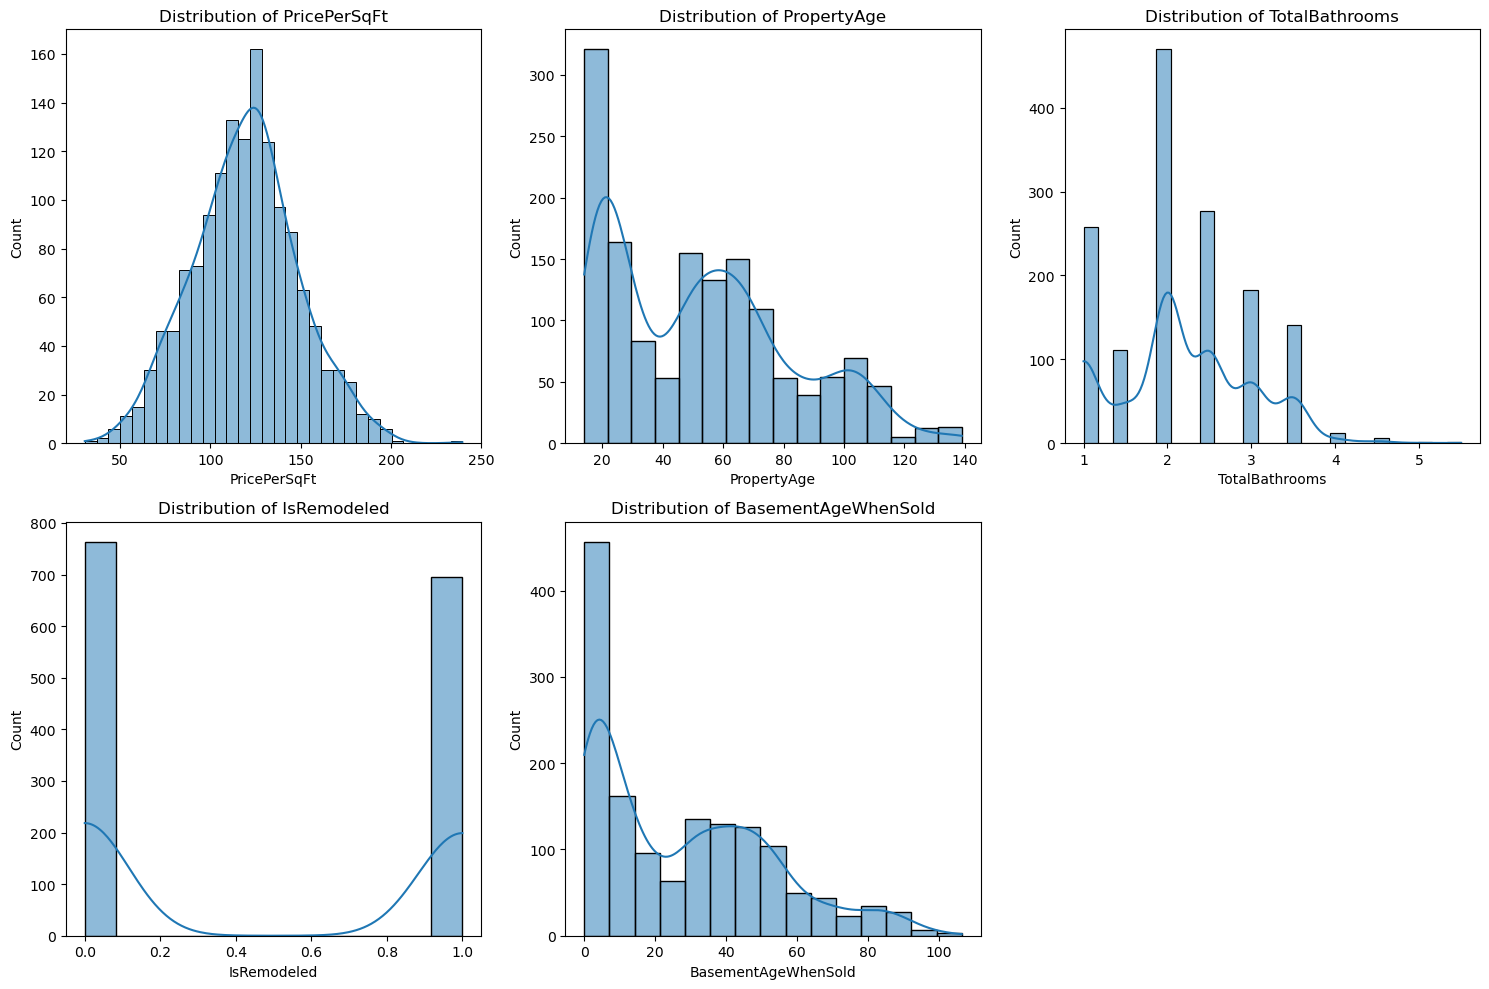

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating skewness
skewness = data[new_features].skew()
print("Skewness of new features:")
print(skewness)

# Visualizing distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(new_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 8. Model Training, Feature Scaling | PCA:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Defining features (X) and target (y)
X = data.drop(columns=['PropPrice'])
y = data['PropPrice']

In [20]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [23]:
# Model training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

performance = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

# Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = model.score(X_test_pca, y_test)
    
    performance[model_name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# 9. Model Performance, Best Model Selection & Saving the Model:

In [24]:
# Displaying Model performance
print("Model Performance:")
for model, metrics in performance.items():
    print(f"{model}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R²={metrics['R²']:.2%}")

Model Performance:
Linear Regression: MAE=18025.91, RMSE=23418.14, R²=88.78%
Decision Tree: MAE=22260.14, RMSE=33382.66, R²=77.21%
Random Forest: MAE=15604.82, RMSE=22037.26, R²=90.07%


In [25]:
# Selecting the best model
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(random_state=42, n_estimators=100)
best_model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Saving the model using Joblib
import joblib

joblib.dump(best_model, 'property_price_model.pkl')

['property_price_model.pkl']

# 10. Load and predict with the model:

In [27]:
loaded_model = joblib.load('property_price_model.pkl')

new_data = X_test.iloc[:5]  
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

predictions = loaded_model.predict(new_data_pca)
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[134007.5   283142.455 110772.    135037.    325149.13 ]


# 11. Checking the difference of Actual & Predicted Values

In [29]:
import pandas as pd

actual_values = y_test.iloc[:5]

# DataFrame to display actual vs predicted values
results_df = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': predictions
})

# Display the results
print("Comparison of Actual vs Predicted Values for New Data:")
print(results_df)

actual_values = y_test.iloc[:5]

# Calculating the difference
results_df['Difference'] = results_df['Actual Values'] - results_df['Predicted Values']

# Display the updated DataFrame with differences
print("\nComparison with Differences:")
print(results_df)

Comparison of Actual vs Predicted Values for New Data:
      Actual Values  Predicted Values
892        154500.0        134007.500
1105       325000.0        283142.455
413        115000.0        110772.000
522        159000.0        135037.000
1036       315500.0        325149.130

Comparison with Differences:
      Actual Values  Predicted Values  Difference
892        154500.0        134007.500   20492.500
1105       325000.0        283142.455   41857.545
413        115000.0        110772.000    4228.000
522        159000.0        135037.000   23963.000
1036       315500.0        325149.130   -9649.130


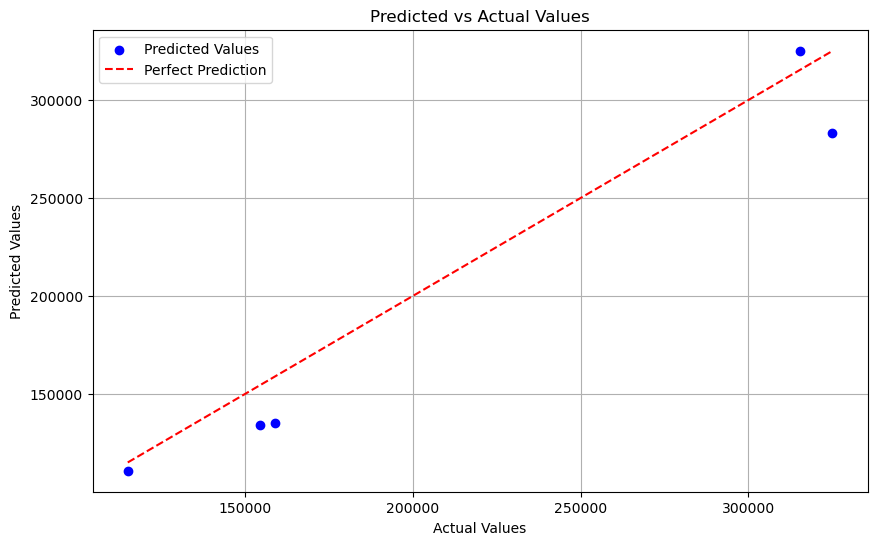

In [30]:
# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions, color='blue', label='Predicted Values')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

# 12. Improving Predictions with Hyperparameter Tuning in XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Defining the model
model = xgb.XGBRegressor()

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Setting up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predictions with the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Absolute Error: 5396.38711338827


In [32]:
import pandas as pd

importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                   Feature  Importance
4              OverallQual    0.255490
229         TotalBathrooms    0.100364
125     BasementFinish_Unf    0.094676
14            BsmntSqFtage    0.087248
31            BasementCars    0.075347
..                     ...         ...
123     Orientation_Inside    0.000000
43   Roof2Material_Brk Cmn    0.000000
42   Roof2Material_AsphShn    0.000000
126       RoofMatl_CompShg    0.000000
116   HeatingEfficiency_Fa    0.000000

[232 rows x 2 columns]


In [33]:
# Assuming new_data is your new input data
new_predictions = best_model.predict(new_data)
new_predictions

array([149565.12, 327509.97, 120519.97, 162825.55, 313407.4 ],
      dtype=float32)

# 13. Comparison of Actual vs Predicted Values after Improving & Tuning

In [36]:
# New DataFrame to display actual vs predicted values
results_df_new = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': new_predictions
})

# Calculate the difference
results_df_new['Difference'] = results_df_new['Actual Values'] - results_df_new['Predicted Values']

# Display the updated DataFrame with differences
print("\nComparison with Differences:")
print(results_df_new)


Comparison with Differences:
      Actual Values  Predicted Values   Difference
892        154500.0     149565.125000  4934.875000
1105       325000.0     327509.968750 -2509.968750
413        115000.0     120519.968750 -5519.968750
522        159000.0     162825.546875 -3825.546875
1036       315500.0     313407.406250  2092.593750


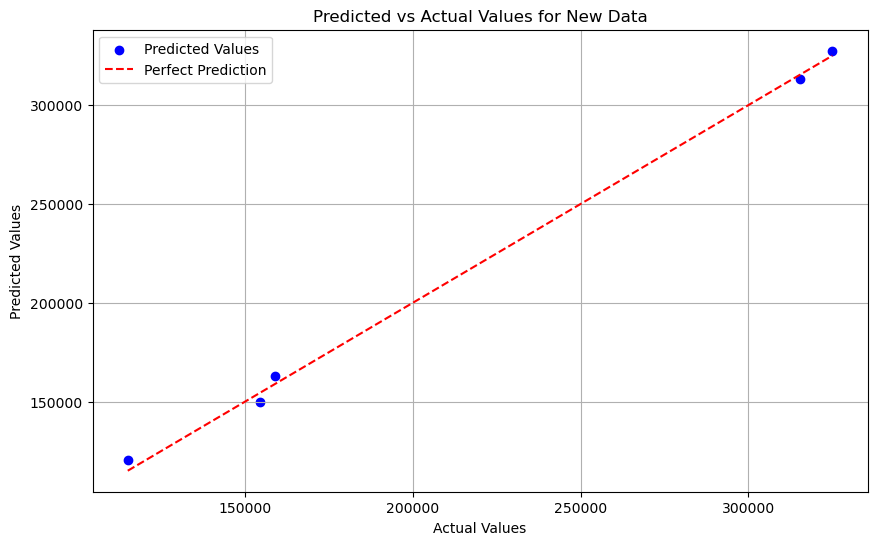

In [37]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, new_predictions, color='blue', label='Predicted Values')
plt.plot([actual_values.min(), actual_values.max()], 
         [actual_values.min(), actual_values.max()], 
         'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for New Data')
plt.legend()
plt.grid()
plt.show()